In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('raw-data.csv')
data.head()

,period_id,branch_code,product_id,product_code,color,size,net_quantity,lag_7,lag_14,code_volume,...,s_sales,c_ratio,s_ratio,s_s_rate,s_g_s_rate,g_s_rate,s_g_rate,c_s,is_nos,c_w_s_status
0,1,B124,21WW23074MAEK75C,21WW23074MA,EK,75C,NaN,0,0,0.164179,...,11971,0.351358,0.096847,0.451,0.888,1.91,0.55,0,0,0
1,2,B124,21WW23074MAEK75C,21WW23074MA,EK,75C,0.0,0,0,0.164179,...,11971,0.351358,0.096847,0.451,0.888,1.91,0.55,0,0,0
2,3,B124,21WW23074MAEK75C,21WW23074MA,EK,75C,0.0,0,0,0.164179,...,11971,0.351358,0.096847,0.451,0.888,1.91,0.55,0,0,0
3,4,B124,21WW23074MAEK75C,21WW23074MA,EK,75C,0.0,0,0,0.164179,...,11971,0.351358,0.096847,0.451,0.888,1.91,0.55,0,0,0
4,5,B124,21WW23074MAEK75C,21WW23074MA,EK,75C,0.0,0,0,0.164179,...,11971,0.351358,0.096847,0.451,0.888,1.91,0.55,0,0,0


In [3]:
data.shape

(10000, 23)

In [4]:
data.isnull().sum()

period_id          0
branch_code        0
product_id         0
product_code       0
color              0
size               0
net_quantity     326
lag_7              0
lag_14             0
code_volume        0
p_id_volume        0
s_p_id_volume      0
p_id_sales         0
s_sales            0
c_ratio            0
s_ratio            0
s_s_rate           0
s_g_s_rate         0
g_s_rate           0
s_g_rate           0
c_s                0
is_nos             0
c_w_s_status       0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   period_id      10000 non-null  int64  
 1   branch_code    10000 non-null  object 
 2   product_id     10000 non-null  object 
 3   product_code   10000 non-null  object 
 4   color          10000 non-null  object 
 5   size           10000 non-null  object 
 6   net_quantity   9674 non-null   float64
 7   lag_7          10000 non-null  int64  
 8   lag_14         10000 non-null  int64  
 9   code_volume    10000 non-null  float64
 10  p_id_volume    10000 non-null  float64
 11  s_p_id_volume  10000 non-null  float64
 12  p_id_sales     10000 non-null  int64  
 13  s_sales        10000 non-null  int64  
 14  c_ratio        10000 non-null  float64
 15  s_ratio        10000 non-null  float64
 16  s_s_rate       10000 non-null  float64
 17  s_g_s_rate     10000 non-null  float64
 18  g_s_rat

In [6]:
data['net_quantity'].unique()

array([nan,  0.,  1.,  3.,  2.,  4.,  5.,  6.,  8.,  9.,  7.])

# Data Preprocessing

<AxesSubplot:xlabel='net_quantity'>

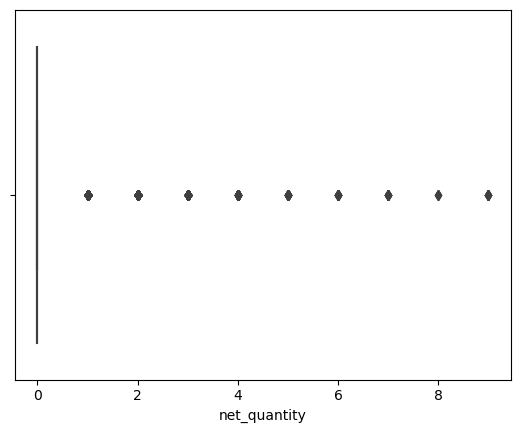

In [7]:
import seaborn as sns 
sns.boxplot(x=data['net_quantity'])


In [8]:
data['net_quantity'].value_counts()

0.0    8214
1.0     954
2.0     259
3.0     147
4.0      43
5.0      25
6.0      13
7.0       9
9.0       7
8.0       3
Name: net_quantity, dtype: int64

# Outlier Limits of Target Variable

QUESTION 2 & QUESTION 4: When we did outlier analysis, we saw that all values except "0" were removed, but we thought that our model would not work correctly in this way. We concluded that removing all "0 "s would also be wrong, thinking that our model would give inconsistent results. However, we also found that some values in the net_quantity column were too few compared to the total value. We decided to apply a partial outlier analysis. At the end of this analysis, we used a method that would accept the lowest value in the column as "0" and the highest value as "3". 

In [9]:

upper_limit = 3
lower_limit = 0

data.loc[data['net_quantity'] > upper_limit, 'net_quantity'] = upper_limit

data.loc[data['net_quantity'] < lower_limit, 'net_quantity'] = lower_limit


In [10]:
data['net_quantity'].value_counts()

0.0    8214
1.0     954
2.0     259
3.0     247
Name: net_quantity, dtype: int64

In [11]:
missing_values = data['net_quantity'].isnull().sum()
print(f'Number of missing values after replacement: {missing_values}')

Number of missing values after replacement: 326


QUESTION 3: When we analyze the missing value for the net_quantity column, we found that there are 326 NaN values. We haven't dropped or filled these values. We will use another perspective.

In [12]:
data['color'].unique()

array(['EK', 'YES', 'TRC', 'SY', 'HK', 'KRMT', 'LC', 'BY', 'IND', 'KIR',
       'KBY', 'AMV', 'NAR', 'Lİ', 'FIS', 'YESMV', 'PYES', 'SY-YES',
       'KAHVER', 'TE', 'FME', 'VİS', 'KAR', 'MRE', 'ANT-SY', 'ANTMELJ',
       'ANT', 'KAH', 'GRM', 'AML', 'TEN', 'TUR', 'BEJ', 'SOM', 'PET',
       'PUD', 'SOFTLİ', 'VIZ', 'BOR', 'GR', 'AGR', 'KIND'], dtype=object)

In [13]:
data['branch_code'].unique()

array(['B124', 'B145', 'B149'], dtype=object)

In [14]:
data['product_code'].unique()

array(['21WW23074MA', '22SW35094ST', '22SW55054UK', '22SW55059UK',
       '22SW55061UK', '22WM28118MA', '22WM28121MA', '23SM12160ME',
       '23SM16121ME', '23SM16146ME', '23SM18240NG', '23SM18248ME',
       '23SM18250ME', '23SM28019MA', '23SM28132MA', '23SM81008NG',
       '23SM81009NG', '23SM81011ME', '23SM84069ST', '23SW15229BB',
       '23SW17365BB', '23SW17383BB', '23SW17451BB', '23SW21090EB',
       '23SW49042BB', '23SW81002GB', '23SW81008GB', '23SW81015ST',
       '23SW81031ST', '23SW81045ST', '23SW82035ST', '23SW85014ST',
       '23SW85023ST', '23SW85054ST', '23SW85057ST', '23SW96015UK',
       'B0169030', 'B0169031', 'B0169032', 'B0169034', 'B0169037',
       'B0169038', 'B0169041', 'B0169042', 'B0169245', 'B0169246',
       'B0169247', 'B0169248', 'B0169251', 'B0169255', 'B0169257',
       'B0169259', 'B0169262', 'B0169264', 'B0169267', 'B0169271',
       'B0169274', 'B0169275', 'B0169280', 'B0169281', 'B0169282',
       'B0169283', 'B0169284', 'B0169285', 'B0169288', 'B01695

In [15]:
data['size'].unique()

array(['75C', '80C', '44', '36-38', '39-41', 'M', 'XL', 'L', '2XL', '42',
       '38', '40', '36', '46', 'ST', '90B', '75B', '70A', '80B', '85B',
       '85C', '90C', '80D', '75D', '85D', '95B', '95D', '100B', '95C',
       '105D', '100DD', '90D', 'S', '3XL', 'XXL', '42-44', '100D'],
      dtype=object)

# Outlier Analysis

In [16]:
import pandas as pd
import numpy as np

Q1 = data.drop('net_quantity', axis=1).quantile(0.25)
Q3 = data.drop('net_quantity', axis=1).quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR

mask = data.columns != 'net_quantity'

outliers = data[((data.loc[:, mask] < lower_bound) | (data.loc[:, mask] > upper_bound)).any(axis=1)]
data_no_outliers = data[~((data.loc[:, mask] < lower_bound) | (data.loc[:, mask] > upper_bound)).any(axis=1)]


C:\Users\VICTUS\AppData\Local\Temp\ipykernel_17300\891196515.py:13: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = data[((data.loc[:, mask] < lower_bound) | (data.loc[:, mask] > upper_bound)).any(axis=1)]
C:\Users\VICTUS\AppData\Local\Temp\ipykernel_17300\891196515.py:14: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_no_outliers = data[~((data.loc[:, mask] < lower_bound) | (data.loc[:, mask] > upper_bound)).any(axis=1)]


In [17]:
outlier_counts = ((data < lower_bound) | (data > upper_bound)).sum()
print(outlier_counts)

branch_code         0
c_ratio          1267
c_s                 0
c_w_s_status     1669
code_volume       600
color               0
g_s_rate          461
is_nos           1069
lag_14           1409
lag_7            1460
net_quantity        0
p_id_sales        298
p_id_volume       210
period_id           0
product_code        0
product_id          0
s_g_rate           53
s_g_s_rate          0
s_p_id_volume     761
s_ratio           562
s_s_rate            0
s_sales             0
size                0
dtype: int64


C:\Users\VICTUS\AppData\Local\Temp\ipykernel_17300\4105145951.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outlier_counts = ((data < lower_bound) | (data > upper_bound)).sum()


QUESTION 4 : When we checked the results of the outlier analysis, we found that most of the rows were removed and only "0" values remained in the target value. So we thought it wouldn't be right to use outlier analysis except the net_quantity column.

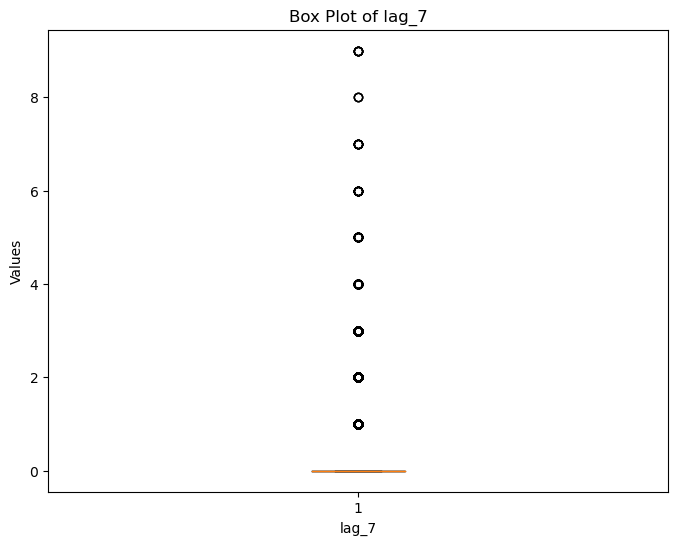

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.boxplot(data['lag_7'])
plt.xlabel('lag_7')
plt.ylabel('Values')
plt.title('Box Plot of lag_7')
plt.show()

# Robust Scaler

Question 1: Since the dataset contains both numeric and categorical values, for the numerical values we have used robust scaler.

In [19]:
from sklearn.preprocessing import RobustScaler

numerical_cols = ['c_ratio', 'c_w_s_status', 'code_volume', 'g_s_rate', 'is_nos', 'lag_14',
                  'lag_7', 'net_quantity', 'p_id_sales', 'p_id_volume', 's_g_rate',
                  's_p_id_volume', 's_ratio']

scaler = RobustScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])



In [20]:
data.head()

,period_id,branch_code,product_id,product_code,color,size,net_quantity,lag_7,lag_14,code_volume,...,s_sales,c_ratio,s_ratio,s_s_rate,s_g_s_rate,g_s_rate,s_g_rate,c_s,is_nos,c_w_s_status
0,1,B124,21WW23074MAEK75C,21WW23074MA,EK,75C,NaN,0.0,0.0,0.026225,...,11971,-0.00482,-0.464081,0.451,0.888,-0.887417,-0.325,0,-1.0,-1.0
1,2,B124,21WW23074MAEK75C,21WW23074MA,EK,75C,0.0,0.0,0.0,0.026225,...,11971,-0.00482,-0.464081,0.451,0.888,-0.887417,-0.325,0,-1.0,-1.0
2,3,B124,21WW23074MAEK75C,21WW23074MA,EK,75C,0.0,0.0,0.0,0.026225,...,11971,-0.00482,-0.464081,0.451,0.888,-0.887417,-0.325,0,-1.0,-1.0
3,4,B124,21WW23074MAEK75C,21WW23074MA,EK,75C,0.0,0.0,0.0,0.026225,...,11971,-0.00482,-0.464081,0.451,0.888,-0.887417,-0.325,0,-1.0,-1.0
4,5,B124,21WW23074MAEK75C,21WW23074MA,EK,75C,0.0,0.0,0.0,0.026225,...,11971,-0.00482,-0.464081,0.451,0.888,-0.887417,-0.325,0,-1.0,-1.0


For the branch_code, we had 3 different unique categorical values, and we have encode them with 0,1 and 2.

In [21]:
branch_code_map = {
    'B124': 0,
    'B145': 1,
    'B149': 2,
}

data['branch_code'] = data['branch_code'].map(branch_code_map)

In [22]:
data.head()

,period_id,branch_code,product_id,product_code,color,size,net_quantity,lag_7,lag_14,code_volume,...,s_sales,c_ratio,s_ratio,s_s_rate,s_g_s_rate,g_s_rate,s_g_rate,c_s,is_nos,c_w_s_status
0,1,0,21WW23074MAEK75C,21WW23074MA,EK,75C,NaN,0.0,0.0,0.026225,...,11971,-0.00482,-0.464081,0.451,0.888,-0.887417,-0.325,0,-1.0,-1.0
1,2,0,21WW23074MAEK75C,21WW23074MA,EK,75C,0.0,0.0,0.0,0.026225,...,11971,-0.00482,-0.464081,0.451,0.888,-0.887417,-0.325,0,-1.0,-1.0
2,3,0,21WW23074MAEK75C,21WW23074MA,EK,75C,0.0,0.0,0.0,0.026225,...,11971,-0.00482,-0.464081,0.451,0.888,-0.887417,-0.325,0,-1.0,-1.0
3,4,0,21WW23074MAEK75C,21WW23074MA,EK,75C,0.0,0.0,0.0,0.026225,...,11971,-0.00482,-0.464081,0.451,0.888,-0.887417,-0.325,0,-1.0,-1.0
4,5,0,21WW23074MAEK75C,21WW23074MA,EK,75C,0.0,0.0,0.0,0.026225,...,11971,-0.00482,-0.464081,0.451,0.888,-0.887417,-0.325,0,-1.0,-1.0


In [23]:
data['branch_code'].unique()

array([0, 1, 2], dtype=int64)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   period_id      10000 non-null  int64  
 1   branch_code    10000 non-null  int64  
 2   product_id     10000 non-null  object 
 3   product_code   10000 non-null  object 
 4   color          10000 non-null  object 
 5   size           10000 non-null  object 
 6   net_quantity   9674 non-null   float64
 7   lag_7          10000 non-null  float64
 8   lag_14         10000 non-null  float64
 9   code_volume    10000 non-null  float64
 10  p_id_volume    10000 non-null  float64
 11  s_p_id_volume  10000 non-null  float64
 12  p_id_sales     10000 non-null  float64
 13  s_sales        10000 non-null  int64  
 14  c_ratio        10000 non-null  float64
 15  s_ratio        10000 non-null  float64
 16  s_s_rate       10000 non-null  float64
 17  s_g_s_rate     10000 non-null  float64
 18  g_s_rat

In [25]:
data.head()

,period_id,branch_code,product_id,product_code,color,size,net_quantity,lag_7,lag_14,code_volume,...,s_sales,c_ratio,s_ratio,s_s_rate,s_g_s_rate,g_s_rate,s_g_rate,c_s,is_nos,c_w_s_status
0,1,0,21WW23074MAEK75C,21WW23074MA,EK,75C,NaN,0.0,0.0,0.026225,...,11971,-0.00482,-0.464081,0.451,0.888,-0.887417,-0.325,0,-1.0,-1.0
1,2,0,21WW23074MAEK75C,21WW23074MA,EK,75C,0.0,0.0,0.0,0.026225,...,11971,-0.00482,-0.464081,0.451,0.888,-0.887417,-0.325,0,-1.0,-1.0
2,3,0,21WW23074MAEK75C,21WW23074MA,EK,75C,0.0,0.0,0.0,0.026225,...,11971,-0.00482,-0.464081,0.451,0.888,-0.887417,-0.325,0,-1.0,-1.0
3,4,0,21WW23074MAEK75C,21WW23074MA,EK,75C,0.0,0.0,0.0,0.026225,...,11971,-0.00482,-0.464081,0.451,0.888,-0.887417,-0.325,0,-1.0,-1.0
4,5,0,21WW23074MAEK75C,21WW23074MA,EK,75C,0.0,0.0,0.0,0.026225,...,11971,-0.00482,-0.464081,0.451,0.888,-0.887417,-0.325,0,-1.0,-1.0


<AxesSubplot:>

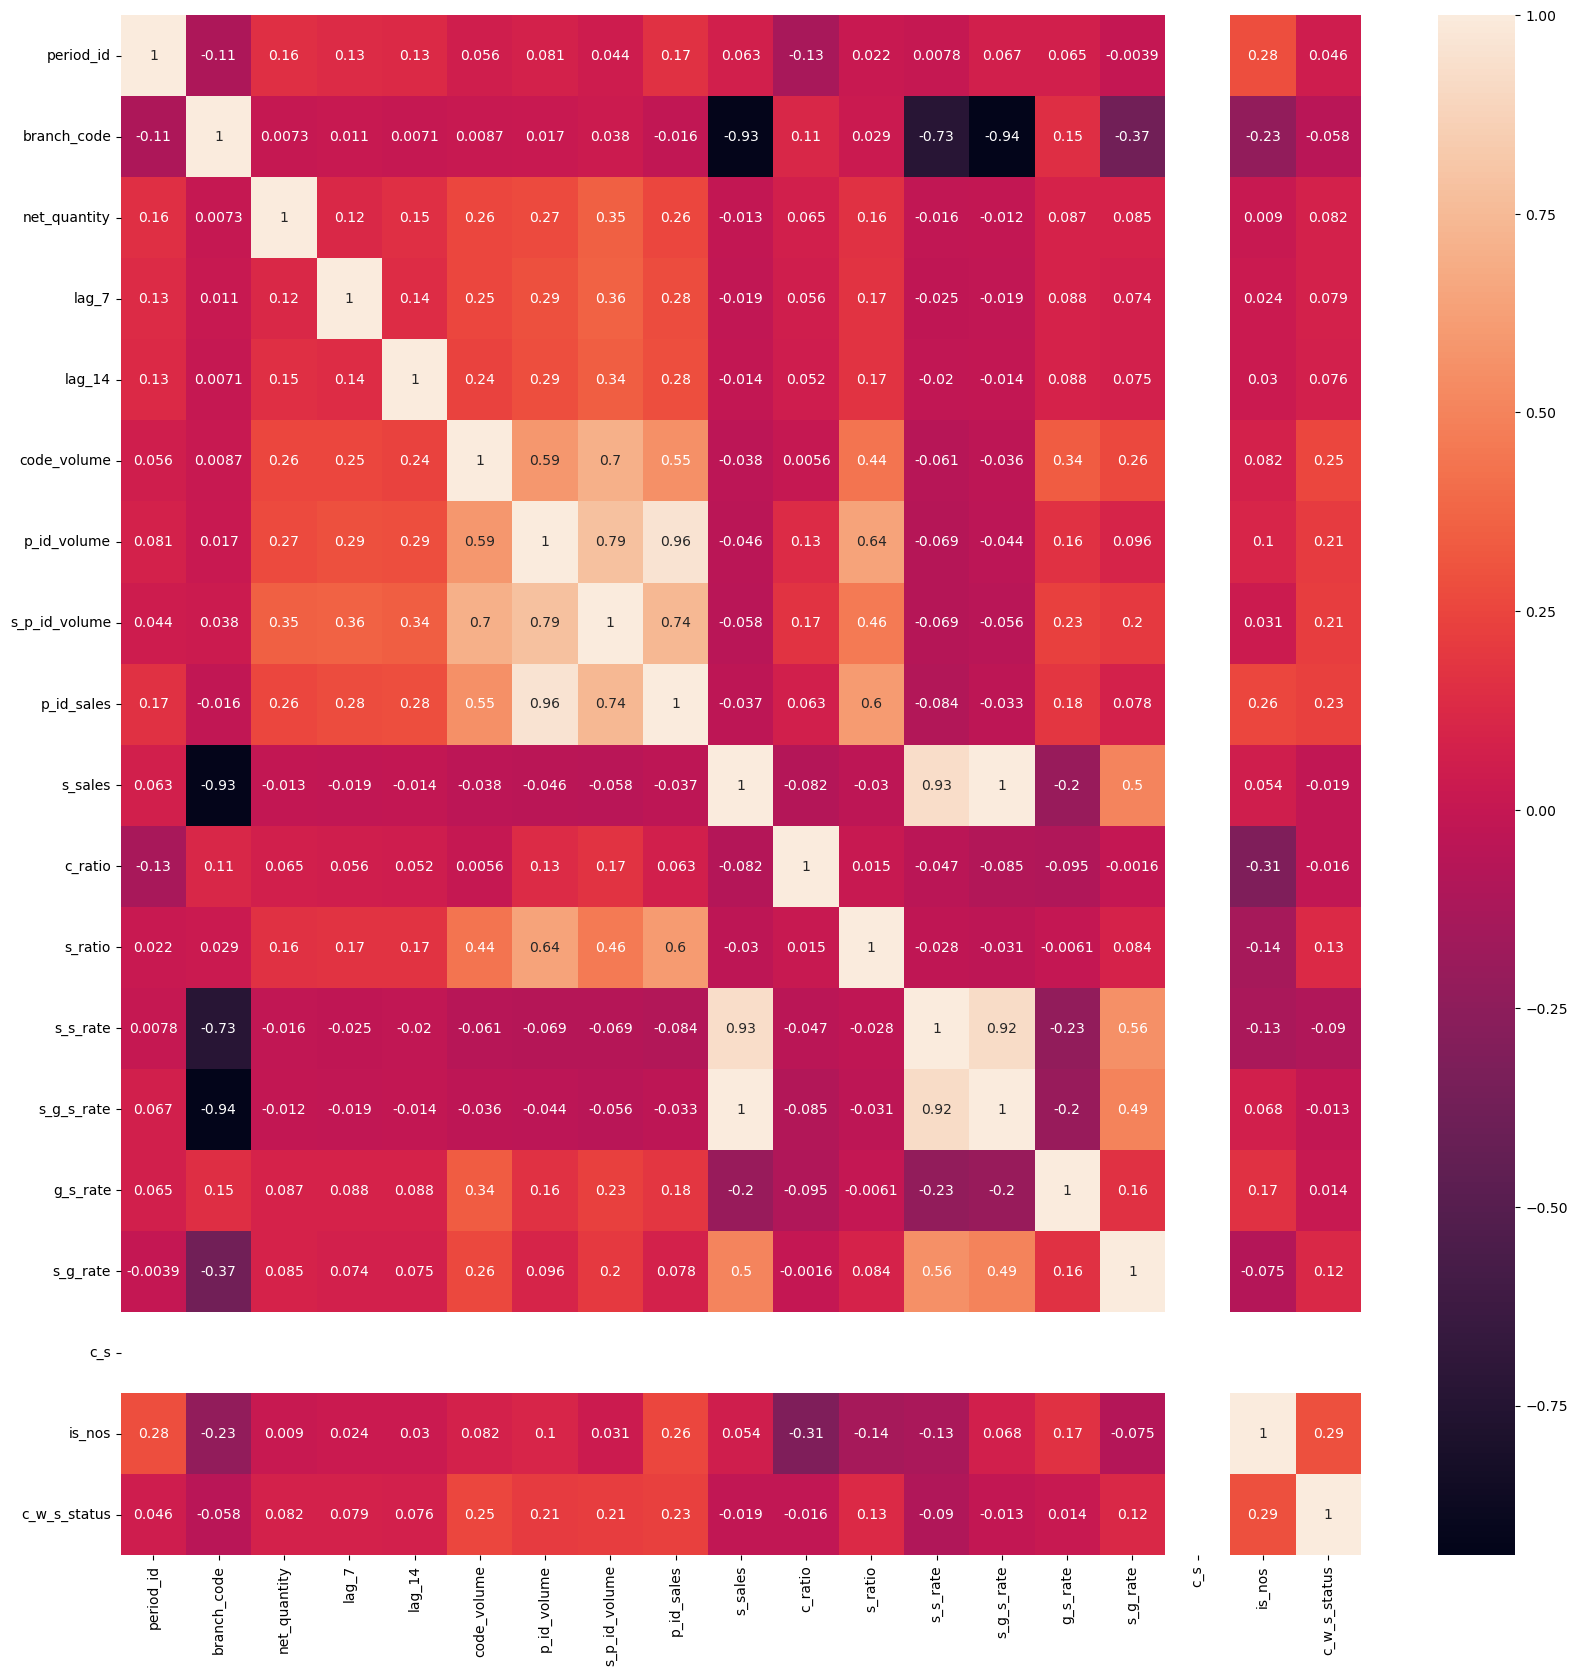

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)

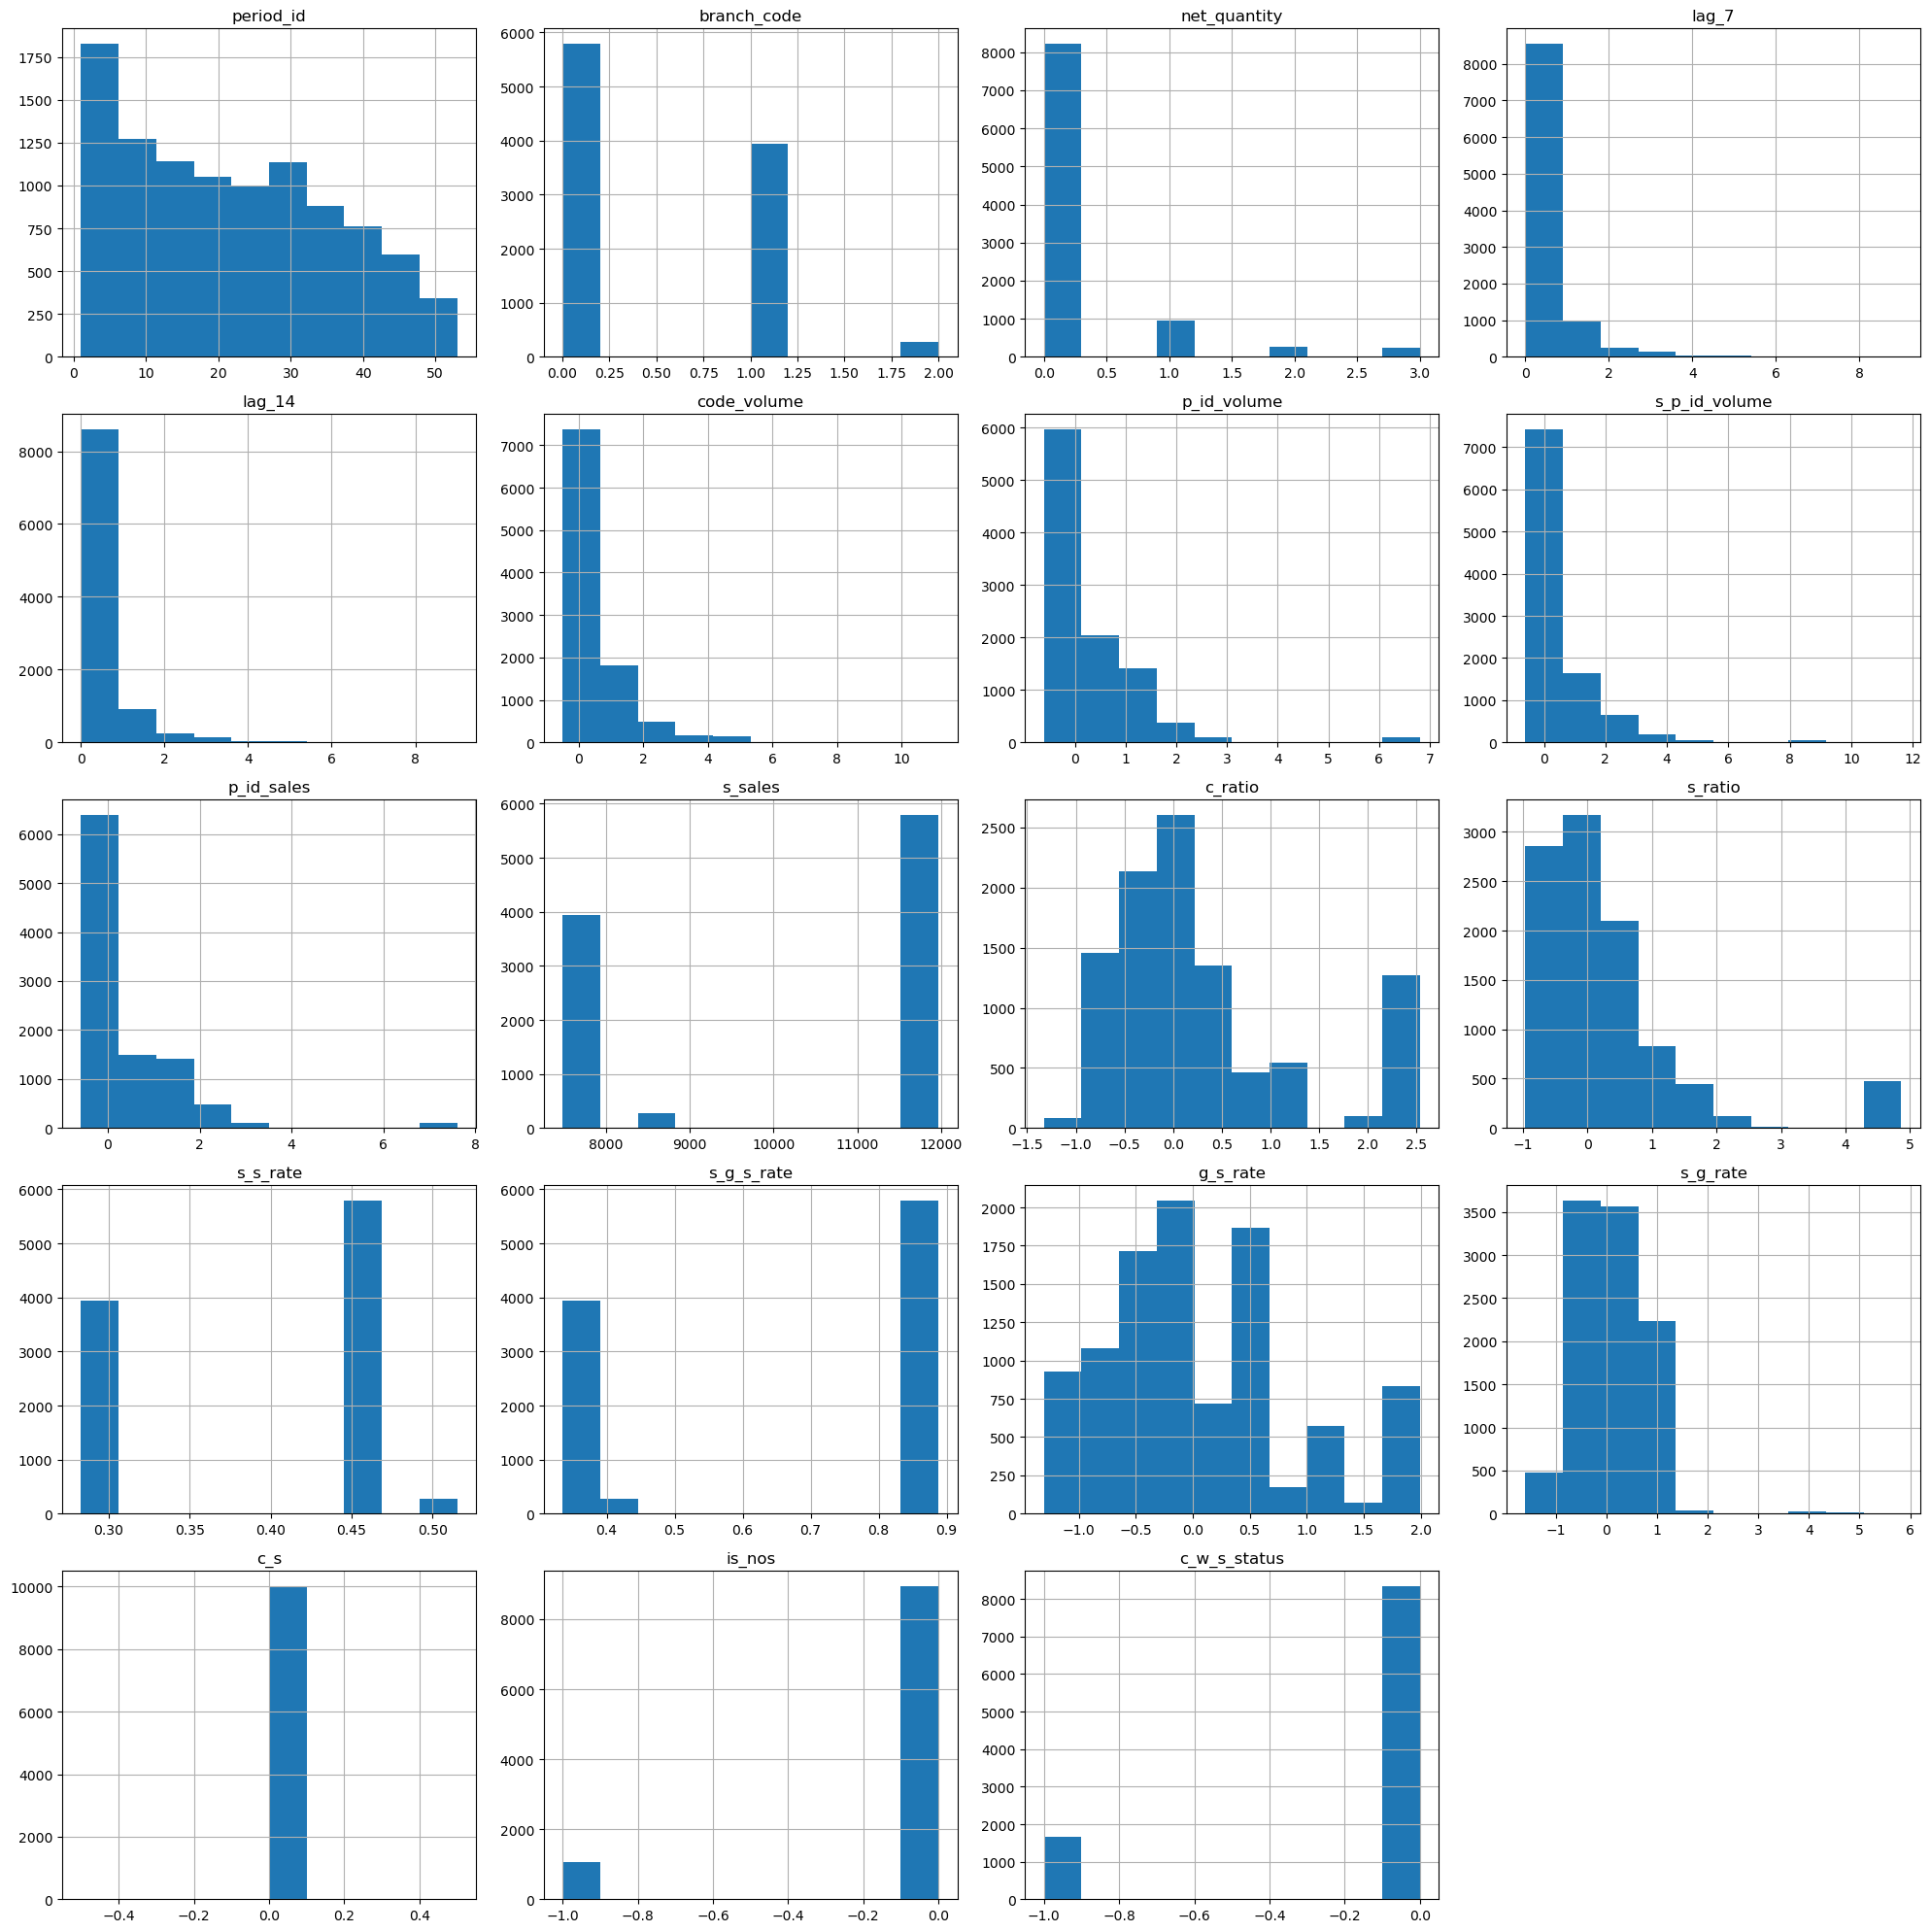

In [27]:
data.hist(figsize=(20, 20));
plt.tight_layout()

# Label Encoding

Question 1: For the categorical values, except the branch_code, we have made label encoding.

In [28]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data["product_code"] = label_encoder.fit_transform(data["product_code"])

data.head()

,period_id,branch_code,product_id,product_code,color,size,net_quantity,lag_7,lag_14,code_volume,...,s_sales,c_ratio,s_ratio,s_s_rate,s_g_s_rate,g_s_rate,s_g_rate,c_s,is_nos,c_w_s_status
0,1,0,21WW23074MAEK75C,0,EK,75C,NaN,0.0,0.0,0.026225,...,11971,-0.00482,-0.464081,0.451,0.888,-0.887417,-0.325,0,-1.0,-1.0
1,2,0,21WW23074MAEK75C,0,EK,75C,0.0,0.0,0.0,0.026225,...,11971,-0.00482,-0.464081,0.451,0.888,-0.887417,-0.325,0,-1.0,-1.0
2,3,0,21WW23074MAEK75C,0,EK,75C,0.0,0.0,0.0,0.026225,...,11971,-0.00482,-0.464081,0.451,0.888,-0.887417,-0.325,0,-1.0,-1.0
3,4,0,21WW23074MAEK75C,0,EK,75C,0.0,0.0,0.0,0.026225,...,11971,-0.00482,-0.464081,0.451,0.888,-0.887417,-0.325,0,-1.0,-1.0
4,5,0,21WW23074MAEK75C,0,EK,75C,0.0,0.0,0.0,0.026225,...,11971,-0.00482,-0.464081,0.451,0.888,-0.887417,-0.325,0,-1.0,-1.0


In [29]:
data['product_code'].unique()

array([  0,   1,   2,   3,   4,   6,   8,  13,  14,  17,  18,  19,  20,
        22,  23,  24,  25,  26,  28,  29,  33,  34,  36,  37,  38,  40,
        41,  42,  43,  44,  46,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
        69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
        82,  83,  84,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
        96,  97,  98, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
       111, 112, 113, 114, 115, 116, 117,  16,  21,  27,  30,  31,  32,
        35,  39,  45,  47,  85,  99, 110,   5,   7,   9,  10,  11,  12,
        15])

In [30]:
label_encoder = LabelEncoder()

data["product_id"] = label_encoder.fit_transform(data["product_id"])

data.head()

,period_id,branch_code,product_id,product_code,color,size,net_quantity,lag_7,lag_14,code_volume,...,s_sales,c_ratio,s_ratio,s_s_rate,s_g_s_rate,g_s_rate,s_g_rate,c_s,is_nos,c_w_s_status
0,1,0,0,0,EK,75C,NaN,0.0,0.0,0.026225,...,11971,-0.00482,-0.464081,0.451,0.888,-0.887417,-0.325,0,-1.0,-1.0
1,2,0,0,0,EK,75C,0.0,0.0,0.0,0.026225,...,11971,-0.00482,-0.464081,0.451,0.888,-0.887417,-0.325,0,-1.0,-1.0
2,3,0,0,0,EK,75C,0.0,0.0,0.0,0.026225,...,11971,-0.00482,-0.464081,0.451,0.888,-0.887417,-0.325,0,-1.0,-1.0
3,4,0,0,0,EK,75C,0.0,0.0,0.0,0.026225,...,11971,-0.00482,-0.464081,0.451,0.888,-0.887417,-0.325,0,-1.0,-1.0
4,5,0,0,0,EK,75C,0.0,0.0,0.0,0.026225,...,11971,-0.00482,-0.464081,0.451,0.888,-0.887417,-0.325,0,-1.0,-1.0


In [31]:
data['product_id'].unique()

array([  0,   2,   8,   9,  10,  11,  12,  13,  15,  16,  18,  24,  25,
        30,  32,  33,  34,  36,  37,  38,  39,  40,  43,  44,  48,  49,
        51,  53,  54,  55,  57,  58,  59,  60,  61,  63,  65,  67,  68,
        69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
        82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
        95,  96,  97,  99, 100, 101, 102, 103, 105, 106, 107, 108, 109,
       110, 111, 112, 113, 114, 115, 118, 119, 120, 121, 122, 123, 124,
       125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137,
       138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 151, 152,
       153, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 182, 183, 184,
       185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197,
       198, 199, 201, 202, 204, 205, 206, 207, 208, 209, 210, 211, 212,
       213,   1,   4,   6,   7,  29,  31,  35,  41,  42,  45,  4

In [32]:
label_encoder = LabelEncoder()

data["size"] = label_encoder.fit_transform(data["size"])

data.head()

,period_id,branch_code,product_id,product_code,color,size,net_quantity,lag_7,lag_14,code_volume,...,s_sales,c_ratio,s_ratio,s_s_rate,s_g_s_rate,g_s_rate,s_g_rate,c_s,is_nos,c_w_s_status
0,1,0,0,0,EK,17,NaN,0.0,0.0,0.026225,...,11971,-0.00482,-0.464081,0.451,0.888,-0.887417,-0.325,0,-1.0,-1.0
1,2,0,0,0,EK,17,0.0,0.0,0.0,0.026225,...,11971,-0.00482,-0.464081,0.451,0.888,-0.887417,-0.325,0,-1.0,-1.0
2,3,0,0,0,EK,17,0.0,0.0,0.0,0.026225,...,11971,-0.00482,-0.464081,0.451,0.888,-0.887417,-0.325,0,-1.0,-1.0
3,4,0,0,0,EK,17,0.0,0.0,0.0,0.026225,...,11971,-0.00482,-0.464081,0.451,0.888,-0.887417,-0.325,0,-1.0,-1.0
4,5,0,0,0,EK,17,0.0,0.0,0.0,0.026225,...,11971,-0.00482,-0.464081,0.451,0.888,-0.887417,-0.325,0,-1.0,-1.0


In [33]:
label_encoder = LabelEncoder()

data["color"] = label_encoder.fit_transform(data["color"])

data.head()

,period_id,branch_code,product_id,product_code,color,size,net_quantity,lag_7,lag_14,code_volume,...,s_sales,c_ratio,s_ratio,s_s_rate,s_g_s_rate,g_s_rate,s_g_rate,c_s,is_nos,c_w_s_status
0,1,0,0,0,9,17,NaN,0.0,0.0,0.026225,...,11971,-0.00482,-0.464081,0.451,0.888,-0.887417,-0.325,0,-1.0,-1.0
1,2,0,0,0,9,17,0.0,0.0,0.0,0.026225,...,11971,-0.00482,-0.464081,0.451,0.888,-0.887417,-0.325,0,-1.0,-1.0
2,3,0,0,0,9,17,0.0,0.0,0.0,0.026225,...,11971,-0.00482,-0.464081,0.451,0.888,-0.887417,-0.325,0,-1.0,-1.0
3,4,0,0,0,9,17,0.0,0.0,0.0,0.026225,...,11971,-0.00482,-0.464081,0.451,0.888,-0.887417,-0.325,0,-1.0,-1.0
4,5,0,0,0,9,17,0.0,0.0,0.0,0.026225,...,11971,-0.00482,-0.464081,0.451,0.888,-0.887417,-0.325,0,-1.0,-1.0


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   period_id      10000 non-null  int64  
 1   branch_code    10000 non-null  int64  
 2   product_id     10000 non-null  int32  
 3   product_code   10000 non-null  int32  
 4   color          10000 non-null  int32  
 5   size           10000 non-null  int32  
 6   net_quantity   9674 non-null   float64
 7   lag_7          10000 non-null  float64
 8   lag_14         10000 non-null  float64
 9   code_volume    10000 non-null  float64
 10  p_id_volume    10000 non-null  float64
 11  s_p_id_volume  10000 non-null  float64
 12  p_id_sales     10000 non-null  float64
 13  s_sales        10000 non-null  int64  
 14  c_ratio        10000 non-null  float64
 15  s_ratio        10000 non-null  float64
 16  s_s_rate       10000 non-null  float64
 17  s_g_s_rate     10000 non-null  float64
 18  g_s_rat

In [35]:
data["product_id"] = data["product_id"].astype("int64")
data["product_code"] = data["product_code"].astype("int64")
data["color"] = data["color"].astype("int64")
data["size"] = data["size"].astype("int64")

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   period_id      10000 non-null  int64  
 1   branch_code    10000 non-null  int64  
 2   product_id     10000 non-null  int64  
 3   product_code   10000 non-null  int64  
 4   color          10000 non-null  int64  
 5   size           10000 non-null  int64  
 6   net_quantity   9674 non-null   float64
 7   lag_7          10000 non-null  float64
 8   lag_14         10000 non-null  float64
 9   code_volume    10000 non-null  float64
 10  p_id_volume    10000 non-null  float64
 11  s_p_id_volume  10000 non-null  float64
 12  p_id_sales     10000 non-null  float64
 13  s_sales        10000 non-null  int64  
 14  c_ratio        10000 non-null  float64
 15  s_ratio        10000 non-null  float64
 16  s_s_rate       10000 non-null  float64
 17  s_g_s_rate     10000 non-null  float64
 18  g_s_rat

# Correlation Matrix

<AxesSubplot:>

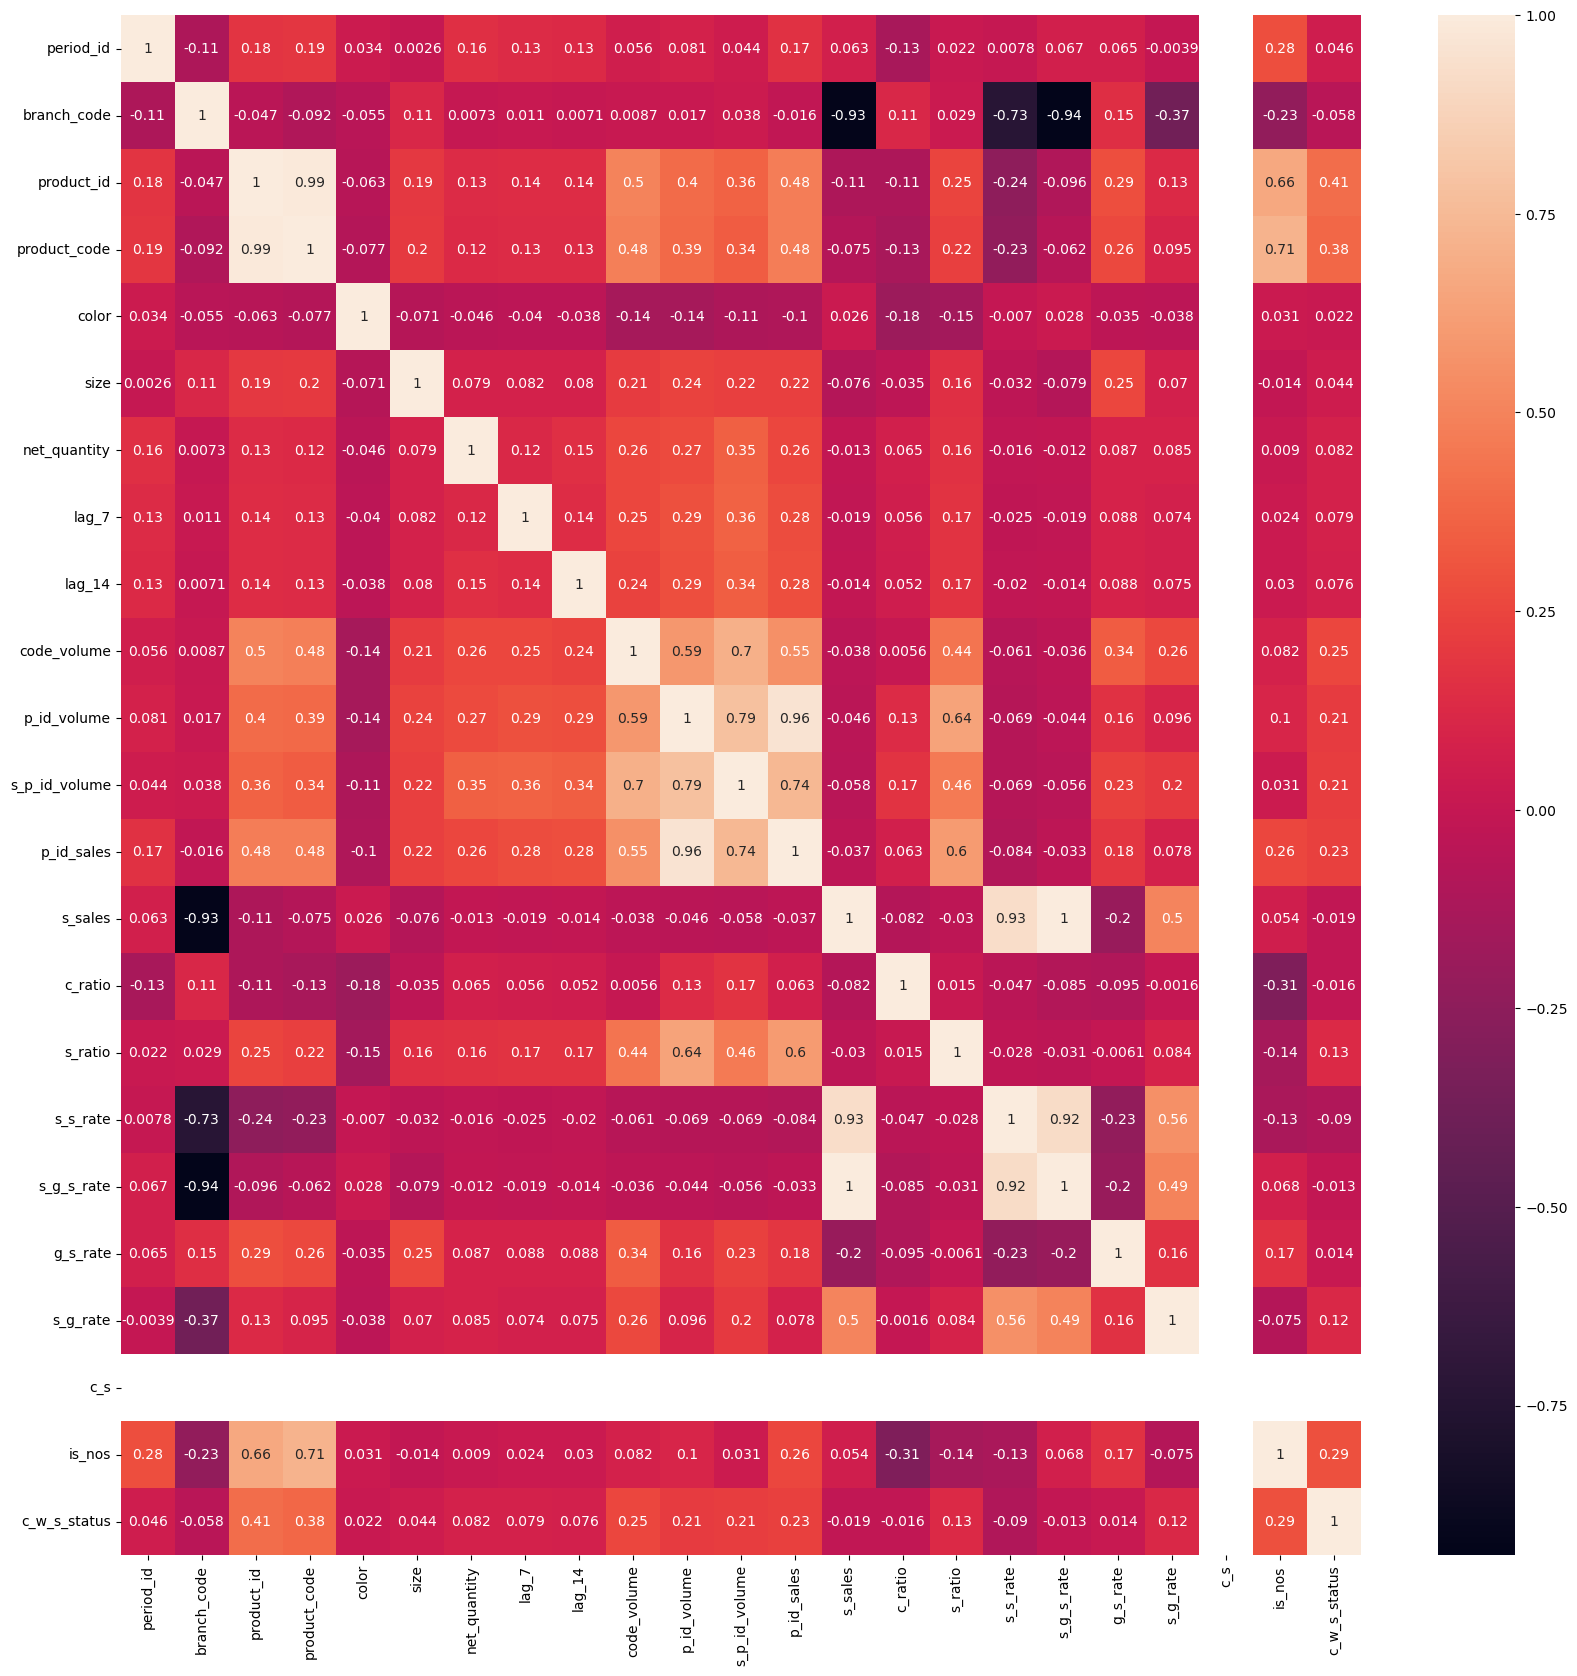

In [37]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)


In [38]:
data['period_id'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53], dtype=int64)

In [39]:
data.drop(['c_s','s_sales','s_g_s_rate','p_id_sales'],axis=1,inplace=True)
data.head()

,period_id,branch_code,product_id,product_code,color,size,net_quantity,lag_7,lag_14,code_volume,p_id_volume,s_p_id_volume,c_ratio,s_ratio,s_s_rate,g_s_rate,s_g_rate,is_nos,c_w_s_status
0,1,0,0,0,9,17,NaN,0.0,0.0,0.026225,0.23166,-0.368421,-0.00482,-0.464081,0.451,-0.887417,-0.325,-1.0,-1.0
1,2,0,0,0,9,17,0.0,0.0,0.0,0.026225,0.23166,-0.368421,-0.00482,-0.464081,0.451,-0.887417,-0.325,-1.0,-1.0
2,3,0,0,0,9,17,0.0,0.0,0.0,0.026225,0.23166,-0.368421,-0.00482,-0.464081,0.451,-0.887417,-0.325,-1.0,-1.0
3,4,0,0,0,9,17,0.0,0.0,0.0,0.026225,0.23166,-0.368421,-0.00482,-0.464081,0.451,-0.887417,-0.325,-1.0,-1.0
4,5,0,0,0,9,17,0.0,0.0,0.0,0.026225,0.23166,-0.368421,-0.00482,-0.464081,0.451,-0.887417,-0.325,-1.0,-1.0


QUESTION 5: By doing a correlation matrix, we saw the correlation values between the columns. As a result of our analysis, we deleted the columns 'c_s', 's_sales', 's_g_s_rate', and 'p_id_sales' with high correlation values.

In [40]:
data.drop('product_id',axis=1,inplace=True)
data.head()

,period_id,branch_code,product_code,color,size,net_quantity,lag_7,lag_14,code_volume,p_id_volume,s_p_id_volume,c_ratio,s_ratio,s_s_rate,g_s_rate,s_g_rate,is_nos,c_w_s_status
0,1,0,0,9,17,NaN,0.0,0.0,0.026225,0.23166,-0.368421,-0.00482,-0.464081,0.451,-0.887417,-0.325,-1.0,-1.0
1,2,0,0,9,17,0.0,0.0,0.0,0.026225,0.23166,-0.368421,-0.00482,-0.464081,0.451,-0.887417,-0.325,-1.0,-1.0
2,3,0,0,9,17,0.0,0.0,0.0,0.026225,0.23166,-0.368421,-0.00482,-0.464081,0.451,-0.887417,-0.325,-1.0,-1.0
3,4,0,0,9,17,0.0,0.0,0.0,0.026225,0.23166,-0.368421,-0.00482,-0.464081,0.451,-0.887417,-0.325,-1.0,-1.0
4,5,0,0,9,17,0.0,0.0,0.0,0.026225,0.23166,-0.368421,-0.00482,-0.464081,0.451,-0.887417,-0.325,-1.0,-1.0


QUESTION 5: The columns with another high correlation value were product_code and product_id. We found that the product_code column is more comprehensive than the product_id column (that is, the product_code column consists of the product_id, color and size columns combined.).

# Final Correlation Matrix

<AxesSubplot:>

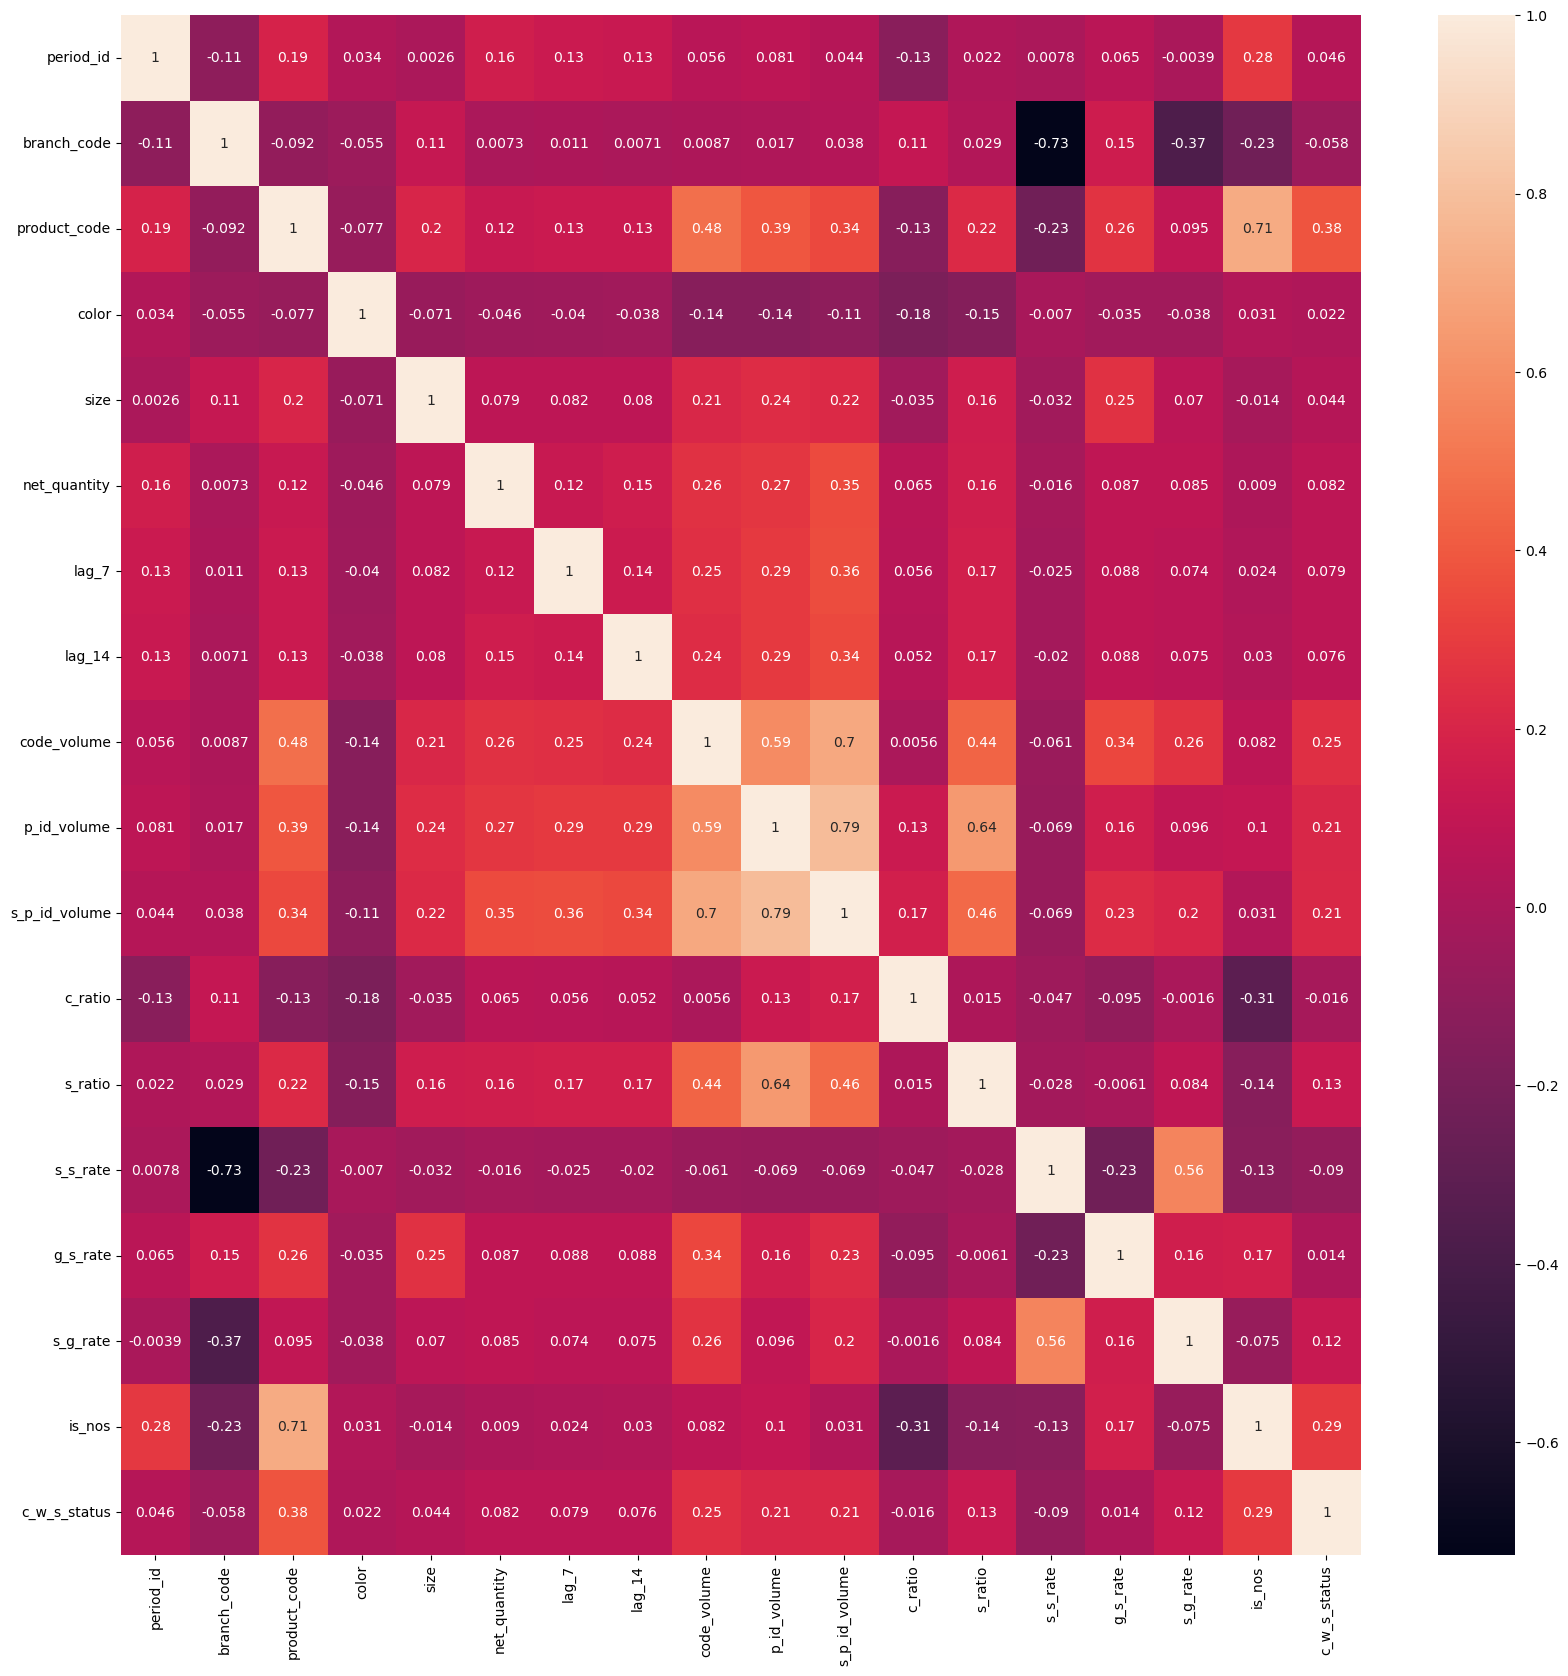

In [41]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)

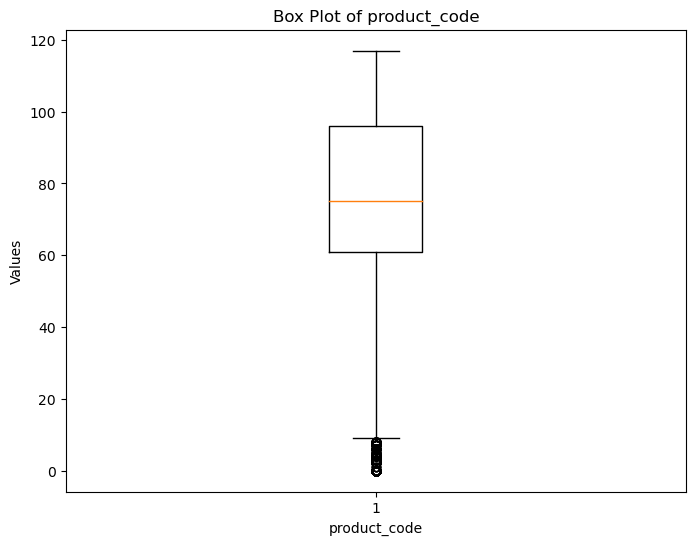

In [42]:

plt.figure(figsize=(8, 6))
plt.boxplot(data['product_code'])
plt.xlabel('product_code')
plt.ylabel('Values')
plt.title('Box Plot of product_code')
plt.show()

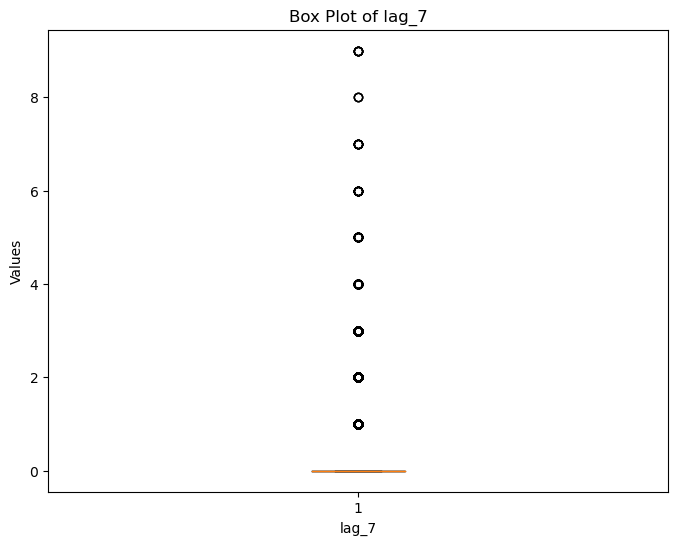

In [43]:

plt.figure(figsize=(8, 6))
plt.boxplot(data['lag_7'])
plt.xlabel('lag_7')
plt.ylabel('Values')
plt.title('Box Plot of lag_7')
plt.show()

In [44]:
data.describe()

,period_id,branch_code,product_code,color,size,net_quantity,lag_7,lag_14,code_volume,p_id_volume,s_p_id_volume,c_ratio,s_ratio,s_s_rate,g_s_rate,s_g_rate,is_nos,c_w_s_status
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,9674.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,21.57180,0.449300,74.349500,22.304500,21.931300,0.228757,0.243800,0.236100,0.418146,0.312220,0.357867,0.297775,0.304464,0.386638,0.057061,0.065380,-0.106900,-0.166900
std,14.09938,0.550509,27.154975,11.018199,10.606254,0.619037,0.754996,0.746199,0.955785,0.956810,1.173087,0.989232,1.209547,0.084166,0.854388,0.673594,0.309002,0.372905
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.505331,-0.610660,-0.603715,-1.327021,-0.961182,0.283000,-1.306843,-1.600000,-1.000000,-1.000000
25%,9.00000,0.000000,61.000000,9.000000,12.000000,0.000000,0.000000,0.000000,-0.222527,-0.262439,-0.342105,-0.427510,-0.443844,0.283000,-0.547461,-0.500000,0.000000,0.000000
50%,20.00000,0.000000,75.000000,25.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.451000,0.000000,0.000000,0.000000,0.000000
75%,33.00000,1.000000,96.000000,32.000000,32.000000,0.000000,0.000000,0.000000,0.777473,0.737561,0.657895,0.572490,0.556156,0.451000,0.452539,0.500000,0.000000,0.000000
max,53.00000,2.000000,117.000000,41.000000,36.000000,3.000000,9.000000,9.000000,11.149572,6.804006,11.631579,2.533872,4.866557,0.515000,1.993377,5.825000,0.000000,0.000000


In [45]:
data['lag_14'].unique()

array([0., 1., 3., 2., 4., 5., 6., 8., 9., 7.])

In [46]:
data['lag_7'].unique()

array([0., 1., 3., 2., 4., 5., 6., 8., 9., 7.])

# Model Evaluation


In [47]:
#XGBoost Regressor
import xgboost as xgb
from xgboost import XGBRegressor

training_data = data.dropna(subset=['net_quantity'])
prediction_data = data[data['net_quantity'].isnull()]

X_train = training_data[['s_p_id_volume', 'p_id_volume', 'code_volume', 's_ratio', 'lag_14', 'period_id', 'lag_7', 'product_code', 'g_s_rate']]
y_train = training_data['net_quantity']

prediction_data_nan = prediction_data[prediction_data['net_quantity'].isnull()]

x_pred = prediction_data_nan[['s_p_id_volume', 'p_id_volume', 'code_volume', 's_ratio', 'lag_14', 'period_id', 'lag_7', 'product_code', 'g_s_rate']]

model = XGBRegressor()
model.fit(X_train, y_train)

predicted_values = model.predict(x_pred)

prediction_data_nan['net_quantity'] = predicted_values

prediction_data_filled = pd.concat([prediction_data, prediction_data_nan], ignore_index=True)

data_filled = pd.concat([training_data, prediction_data_filled], ignore_index=True)


QUESTION 3: Here we have created a special view for rows that have NaN value. That is, we created different predictions for both rows with NaN values and normal rows. 

COMMENT: We have used the best 9 features ('s_p_id_volume', 'p_id_volume', 'code_volume', 's_ratio', 'lag_14', 'period_id', 'lag_7', 'product_code', 'g_s_rate'). We have used XGBRegressor for our model. Then, as we mentioned above, we produced predictions for both NaN values and non-NaN values.

In [48]:
print(data_filled[['product_code','period_id','net_quantity']])

       product_code  period_id  net_quantity
0                 0          2      0.000000
1                 0          3      0.000000
2                 0          4      0.000000
3                 0          5      0.000000
4                 0          6      0.000000
...             ...        ...           ...
10321            12          1     -0.034269
10322            13          1      0.134952
10323            15          1      0.015434
10324            15          1      0.159263
10325            15          1      0.545444

[10326 rows x 3 columns]


In [49]:
from sklearn.metrics import r2_score

y_actual = training_data['net_quantity']

y_pred_train = model.predict(X_train)

r2_train = r2_score(y_actual, y_pred_train)

print("R2 Score (Training Data):", r2_train)


R2 Score (Training Data): 0.6613212626621664


COMMENT: Then we used the r^2 value to measure our XGBRegressor model that we created using best features for training data.

In [50]:
#Random Forest Regressor and MLP Regressor models
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

prediction_data_nan = prediction_data[prediction_data['net_quantity'].isnull()]

if prediction_data_nan.shape[0] > 0:
    
    x_pred = prediction_data_nan[['s_p_id_volume', 'p_id_volume', 'code_volume', 's_ratio', 'lag_14', 'period_id', 'lag_7', 'product_code', 'g_s_rate']]

    rf_model = RandomForestRegressor()
    rf_model.fit(X_train, y_train)

    predicted_values_rf = rf_model.predict(x_pred)

    prediction_data_nan['net_quantity'] = predicted_values_rf

    prediction_data_filled_rf = pd.concat([prediction_data, prediction_data_nan], ignore_index=True)

    data_filled_rf = pd.concat([training_data, prediction_data_filled_rf], ignore_index=True)

    data_filled_rf = data_filled_rf.dropna(subset=['net_quantity'])

    y_true_rf = data_filled_rf['net_quantity']
    y_pred_rf = rf_model.predict(data_filled_rf[X_train.columns])
    r2_rf = r2_score(y_true_rf, y_pred_rf)
    print("R2 value (Random Forest):", r2_rf)

    mlp_model = MLPRegressor()
    mlp_model.fit(X_train, y_train)

    predicted_values_mlp = mlp_model.predict(x_pred)

    prediction_data_nan['net_quantity'] = predicted_values_mlp

    prediction_data_filled_mlp = pd.concat([prediction_data, prediction_data_nan], ignore_index=True)

    data_filled_mlp = pd.concat([training_data, prediction_data_filled_mlp], ignore_index=True)

    data_filled_mlp = data_filled_mlp.dropna(subset=['net_quantity'])

    y_true_mlp = data_filled_mlp['net_quantity']
    y_pred_mlp = mlp_model.predict(data_filled_mlp[X_train.columns])
    r2_mlp = r2_score(y_true_mlp, y_pred_mlp)
    print("R2 value (MLPRegressor):", r2_mlp)
else:
    data_filled_rf = training_data.copy()
    data_filled_mlp = training_data.copy()



R2 value (Random Forest): 0.8691273588866771
R2 value (MLPRegressor): 0.1591613446872393


COMMENT: Then we repeated the same operations for different models (RandomForest and MLPRegressor). Again, using r^2 values, we measured the training data over these models.

In [51]:
predicted_values = data_filled['net_quantity']

print(predicted_values)


0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
10321   -0.034269
10322    0.134952
10323    0.015434
10324    0.159263
10325    0.545444
Name: net_quantity, Length: 10326, dtype: float64


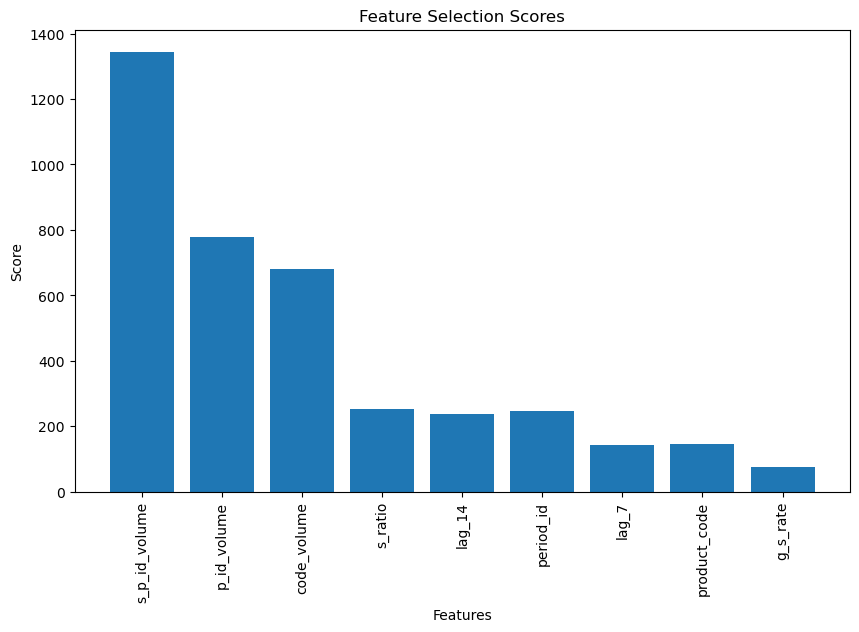

In [52]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
import matplotlib.pyplot as plt

X_train = training_data[['s_p_id_volume', 'p_id_volume', 'code_volume', 's_ratio', 'lag_14', 'period_id', 'lag_7', 'product_code', 'g_s_rate']]
y_train = training_data['net_quantity']

selector = SelectKBest(score_func=f_regression, k=5)
selector.fit(X_train, y_train)

scores = selector.scores_
feature_names = X_train.columns

plt.figure(figsize=(10, 6))
plt.bar(feature_names, scores)
plt.xlabel('Features')
plt.ylabel('Score')
plt.title('Feature Selection Scores')
plt.xticks(rotation=90)
plt.show()


COMMENT: Here we have identified the best features for our model.

In [53]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error

prediction_data_nan = prediction_data[prediction_data['net_quantity'].isnull()]

if prediction_data_nan.shape[0] > 0:
    x_pred = prediction_data_nan[['s_p_id_volume', 'p_id_volume', 'code_volume', 's_ratio', 'lag_14', 'period_id', 'lag_7', 'product_code', 'g_s_rate']]

    xgb_model = XGBRegressor()
    xgb_model.fit(X_train, y_train)

    predicted_values_xgb = xgb_model.predict(x_pred)

    prediction_data_nan['net_quantity'] = predicted_values_xgb

    prediction_data_filled_xgb = pd.concat([prediction_data, prediction_data_nan], ignore_index=True)

    data_filled_xgb = pd.concat([training_data, prediction_data_filled_xgb], ignore_index=True)

    data_filled_xgb = data_filled_xgb.dropna(subset=['net_quantity'])

    result_df = pd.DataFrame(columns=['product_code', 'R2', 'MSE'])
    for code in data_filled_xgb['product_code'].unique():
        subset = data_filled_xgb[data_filled_xgb['product_code'] == code]
        y_true = subset['net_quantity']
        y_pred = xgb_model.predict(subset[X_train.columns])
        r2 = r2_score(y_true, y_pred)
        mse = mean_squared_error(y_true, y_pred)
        result_df = result_df.append({'product_code': code, 'R2': r2, 'MSE': mse}, ignore_index=True)

    print("Results by product_code:")
    print(result_df)

    result_df.to_csv('result.csv', index=False)

else:
    data_filled_xgb = training_data.copy()

    y_true_train = data_filled_xgb['net_quantity']
    y_pred_train = xgb_model.predict(data_filled_xgb[X_train.columns])
    r2_train = r2_score(y_true_train, y_pred_train)
    mse_train = mean_squared_error(y_true_train, y_pred_train)

    result_df = pd.DataFrame({'product_code': data_filled_xgb['product_code'].unique(), 'R2': r2_train, 'MSE': mse_train})

    print("Results for training data:")
    print(result_df)

    result_df.to_csv('result.csv', index=False)



C:\Users\VICTUS\AppData\Local\Temp\ipykernel_17300\2833380442.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'product_code': code, 'R2': r2, 'MSE': mse}, ignore_index=True)
C:\Users\VICTUS\AppData\Local\Temp\ipykernel_17300\2833380442.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'product_code': code, 'R2': r2, 'MSE': mse}, ignore_index=True)
C:\Users\VICTUS\AppData\Local\Temp\ipykernel_17300\2833380442.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'product_code': code, 'R2': r2, 'MSE': mse}, ignore_index=True)
C:\Users\VICTUS\AppData\Local\Temp\ipykernel_17300\2833380442.py:31: FutureWarning: The frame.append metho

Results by product_code:
     product_code        R2       MSE
0             0.0  0.761099  0.054338
1             1.0  0.695673  0.051590
2             2.0  0.824222  0.047702
3             3.0  0.616851  0.070234
4             4.0  0.596873  0.064178
..            ...       ...       ...
113           9.0  0.402237  0.055853
114          10.0  0.586345  0.115497
115          11.0  0.947561  0.008895
116          12.0  0.811924  0.020796
117          15.0  0.622011  0.064102

[118 rows x 3 columns]


C:\Users\VICTUS\AppData\Local\Temp\ipykernel_17300\2833380442.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'product_code': code, 'R2': r2, 'MSE': mse}, ignore_index=True)
C:\Users\VICTUS\AppData\Local\Temp\ipykernel_17300\2833380442.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'product_code': code, 'R2': r2, 'MSE': mse}, ignore_index=True)
C:\Users\VICTUS\AppData\Local\Temp\ipykernel_17300\2833380442.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'product_code': code, 'R2': r2, 'MSE': mse}, ignore_index=True)
C:\Users\VICTUS\AppData\Local\Temp\ipykernel_17300\2833380442.py:31: FutureWarning: The frame.append metho

COMMENT: Here we have printed the prediction values based on product_code and product_id. These outputs are based on XGBRegressor.

In [54]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error

prediction_data_nan = prediction_data[prediction_data['net_quantity'].isnull()]

if prediction_data_nan.shape[0] > 0:
    x_pred = prediction_data_nan[['s_p_id_volume', 'p_id_volume', 'code_volume', 's_ratio', 'lag_14', 'period_id', 'lag_7', 'product_code', 'g_s_rate']]

    xgb_model = XGBRegressor()
    xgb_model.fit(X_train, y_train)

    predicted_values_xgb = xgb_model.predict(x_pred)

    predicted_values_xgb = np.round(predicted_values_xgb)  

    prediction_data_nan['net_quantity'] = predicted_values_xgb.astype(int) 

    prediction_data_filled_xgb = pd.concat([prediction_data, prediction_data_nan], ignore_index=True)

    data_filled_xgb = pd.concat([training_data, prediction_data_filled_xgb], ignore_index=True)

    data_filled_xgb = data_filled_xgb.dropna(subset=['net_quantity'])

    result_df = pd.DataFrame(columns=['product_code', 'Prediction'])
    for code in data_filled_xgb['product_code'].unique():
        subset = data_filled_xgb[data_filled_xgb['product_code'] == code]
        y_true = subset['net_quantity']
        y_pred = xgb_model.predict(subset[X_train.columns])
        predictions = pd.DataFrame({'product_code': code, 'Prediction': y_pred.round().astype(int)})  
        result_df = pd.concat([result_df, predictions], ignore_index=True)

    result_df.to_csv('predictions.csv', index=False)

    print("Predictions saved to 'predictions.csv'.")


Predictions saved to 'predictions.csv'.


COMMENT: Here we have printed the prediction values for each product_code and product_id.Then we saved it to the csv file. These outputs are based on XGBRegressor.

# Test Data

In [55]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

training_data = data.dropna(subset=['net_quantity'])
prediction_data = data[data['net_quantity'].isnull()]

X_train = training_data[['s_p_id_volume', 'p_id_volume', 'code_volume', 's_ratio', 'lag_14', 'period_id', 'lag_7', 'product_code', 'g_s_rate']]
y_train = training_data['net_quantity']

prediction_data_nan = prediction_data[prediction_data['net_quantity'].isnull()]

x_pred = prediction_data_nan[['s_p_id_volume', 'p_id_volume', 'code_volume', 's_ratio', 'lag_14', 'period_id', 'lag_7', 'product_code', 'g_s_rate']]

model = XGBRegressor()
model.fit(X_train, y_train)

predicted_values = model.predict(x_pred)

predicted_values = np.maximum(predicted_values, 0)

prediction_data_nan['net_quantity'] = predicted_values

prediction_data_filled = pd.concat([prediction_data, prediction_data_nan], ignore_index=True)

data_filled = pd.concat([training_data, prediction_data_filled], ignore_index=True)

unique_product_codes = data_filled['product_code'].unique()

results_train = []
results_test = []

for product_code in unique_product_codes:
    subset_data = data_filled[data_filled['product_code'] == product_code]
    
    subset_data = subset_data.dropna(subset=['net_quantity'])
    
    subset_X = subset_data[['s_p_id_volume', 'p_id_volume', 'code_volume', 's_ratio', 'lag_14', 'period_id', 'lag_7', 'product_code', 'g_s_rate']]
    subset_y = subset_data['net_quantity']
    
    X_train, X_test, y_train, y_test = train_test_split(subset_X, subset_y, test_size=0.2, random_state=42)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    r2_train = r2_score(y_train, y_pred_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    results_train.append({'product_code': product_code, 'r2_train': r2_train, 'mse_train': mse_train})
    
    r2_test = r2_score(y_test, y_pred_test)
    mse_test = mean_squared_error(y_test, y_pred_test)
    results_test.append({'product_code': product_code, 'r2_test': r2_test, 'mse_test': mse_test})

results_train_df = pd.DataFrame(results_train)
results_test_df = pd.DataFrame(results_test)

results_test_df['r2_test'].fillna(value=np.nanmean(results_test_df['r2_test']), inplace=True)
results_train_df['r2_train'].fillna(value=np.nanmean(results_train_df['r2_train']), inplace=True)

results_train_df.to_csv('r2_mse_train.csv', index=False)
results_test_df.to_csv('r2_mse_test.csv', index=False)


C:\Users\VICTUS\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\VICTUS\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\VICTUS\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\VICTUS\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\VICTUS\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings

COMMENT: Here we calculated the r^2 and mse values for each line based on product_code for both test and training data and exported to csv file. These outputs are based on XGBRegressor.

In [56]:
filled_data_no_nan = data_filled.dropna(subset=['net_quantity'])

overall_r2_test = r2_score(filled_data_no_nan['net_quantity'], model.predict(filled_data_no_nan[['s_p_id_volume', 'p_id_volume', 'code_volume', 's_ratio', 'lag_14', 'period_id', 'lag_7', 'product_code', 'g_s_rate']]))
print("Overall R2 score (test data):", overall_r2_test)

Overall R2 score (test data): 0.6651338462391645
